# Coronavirus - The venues most riskier for each Bronx neighborhood, NY.

## 1. Introduction.
### 1.1. Description & Discussion
Today, we are going through very hard times, the pandemic is devastating our population, and especially people with limited resources and who are not on equal conditions with the majority of the population. Unfortunately it is known that in NY, The Bronx has been the hardest hit borough in this pandemic for what urges government policies to stop this situation. This report only wants to provide a solid data analysis to help the authorities in taking solutions to a certain extent.

This project wants to achieve is to relate the high infection of each neighborhood given a their rate of Coronavirus cases with the number of most common venues and their visits between February and July , which are not essential and which have a high probability of contagion.

In a nutshell we want to highlight the most prone venues to get infected in every borough from Bronx neighborhoods.

### The Bronx is the hardest-hit borough.
The Bronx has the second highest rate for coronavirus cases, hospitalizations. And in each measure, Staten Island has been the last affected.
The reasons for this have to do with underlying systemic inequalities already present in the city. On average, Manhattan residents have higher incomes and better access to healthcare. Parts of the Bronx, meanwhile, face food deserts, income inequality, public housing that's in poor condition, and low-quality clinical care. The borough is also home to more frontline workers and subway riders[1]. 

The Census Bureau considers the Bronx to be the most diverse area in the country. The borough's most populous racial group, white, declined from 99.3% in 1920 to 44.9% in 2018. The Bronx contains 532,487 housing units, with a median value of $371,800, and with an owner-occupancy rate of 19.7%, the lowest of the five boroughs.

Furthermore, According to the 2010 Census, 53.5% of Bronx's population was of Hispanic, Latino, or Spanish origin (they may be of any race); 30.1% non-Hispanic Black or African American, 10.9% of the population was non-Hispanic White, 3.4% non-Hispanic Asian, 0.6% from some other race (non-Hispanic) and 1.2% of two or more races (non-Hispanic).[2]

### 1.2. Data Description
To consider the problem we can list the datas as below:

The Coronavirus data found was according to a New York Health database the 7 july, the data corresponds to the cases of coronavirus in New York City each borough and neighborhood. [3]. It was Cleaned the data and reduced it to Bronx borough of New York City.
Forsquare API has been used to get the most common venues of given Borough of Bronx,NY [4].
The foot traffic data from visitdata.org website has been used for to filter the top no-essential activities in each venues from New York city (the most infectious activities). Foot traffic for a given county on a given day it is was indexed to average foot traffic for that county since the month of February 2020 [5].
Has been used the Google Map, ‘Search Nearby’ option to get the center coordinates of the each Borough. [6].




In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

## Import location data from NY

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
neighborhoods_data = newyork_data['features']

In [5]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [6]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [7]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [8]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


# 1.- We map neighborhoods in the Bronx, NY to put us in context.

In [9]:
Bronx_data = neighborhoods[neighborhoods['Borough'] == 'Bronx'].reset_index(drop=True)

In [10]:
Bronx_data.head

<bound method NDFrame.head of    Borough         Neighborhood   Latitude  Longitude
0    Bronx            Wakefield  40.894705 -73.847201
1    Bronx           Co-op City  40.874294 -73.829939
2    Bronx          Eastchester  40.887556 -73.827806
3    Bronx            Fieldston  40.895437 -73.905643
4    Bronx            Riverdale  40.890834 -73.912585
5    Bronx          Kingsbridge  40.881687 -73.902818
6    Bronx             Woodlawn  40.898273 -73.867315
7    Bronx              Norwood  40.877224 -73.879391
8    Bronx       Williamsbridge  40.881039 -73.857446
9    Bronx           Baychester  40.866858 -73.835798
10   Bronx       Pelham Parkway  40.857413 -73.854756
11   Bronx          City Island  40.847247 -73.786488
12   Bronx         Bedford Park  40.870185 -73.885512
13   Bronx   University Heights  40.855727 -73.910416
14   Bronx       Morris Heights  40.847898 -73.919672
15   Bronx              Fordham  40.860997 -73.896427
16   Bronx         East Tremont  40.842696 -73.88735

In [11]:
address = 'Bronx, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bronx are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bronx are 40.8466508, -73.8785937.


In [12]:
map_Bronx = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Bronx_data['Latitude'], Bronx_data['Longitude'], Bronx_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Bronx)  
    
map_Bronx

# 2. connection with Foursquare API

In [13]:
CLIENT_ID = 'HJXQPDNVAEK2PHDPJIJRBTISEQLSKMG0ZOS1ZF3QAKKBUWAO' # your Foursquare ID
CLIENT_SECRET = 'KHQH1Q3C1G2FELRZMU1AHX0BGNG2QARUIRU1HZN1HDE4RCFQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HJXQPDNVAEK2PHDPJIJRBTISEQLSKMG0ZOS1ZF3QAKKBUWAO
CLIENT_SECRET:KHQH1Q3C1G2FELRZMU1AHX0BGNG2QARUIRU1HZN1HDE4RCFQ


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's latitude and longitude values.

In [14]:
neighborhood_latitude = Bronx_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Bronx_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = Bronx_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


#### Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.

In [15]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# 3. Explore Neighborhoods in Bronx

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    LIMIT = 100 # 
    venues_list=[]
    categoryId='4d4b7105d754a06378d81259','4d4b7105d754a06377d81259','4d4b7105d754a06375d81259'
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

            
        # make the GET request
        
        results = requests.get(url, "none").json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        
        venues_list.append([(
            name, 
            lat, 
            lng,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],
            v['venue']['location'],
            v['venue']['categories'][0]['id'])for v in results
                        
       
        ])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'location',                           
                  'categoryid'] 
    return(nearby_venues)    


#### Now write the code to run the above function on each neighborhood and create a new dataframe called *Bronx_venues*.

In [17]:
Bronx_venues = getNearbyVenues(names=Bronx_data['Neighborhood'],
                                   latitudes=Bronx_data['Latitude'],
                                   longitudes=Bronx_data['Longitude']
                                                             )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights


In [18]:
Bronx_venues.shape

(1226, 8)

In [19]:
Bronx_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,location,categoryid
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,"{'address': '4120 Baychester Ave', 'crossStree...",4bf58dd8d48988d1d0941735
1,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,"{'address': '4232 Baychester Ave', 'crossStree...",4bf58dd8d48988d10f951735
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,"{'address': '1006 E 233rd St', 'lat': 40.89048...",4bf58dd8d48988d1c9941735
3,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,"{'address': '4232 Baychester Ave', 'lat': 40.8...",4bf58dd8d48988d10f951735
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,"{'address': '980 E 233rd St', 'crossStreet': '...",4bf58dd8d48988d148941735


Scraping the data and cleaning

In [20]:
normalize = pd.io.json.json_normalize(Bronx_venues.location.tolist())['postalCode'].reset_index(drop=True)
df = pd.DataFrame(normalize)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [21]:
df.shape

(1226, 1)

In [22]:
df.dtypes

postalCode    object
dtype: object

In [23]:
Bronx_venues = pd.concat([Bronx_venues,df], axis=1)

In [24]:
Bronx_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,location,categoryid,postalCode
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,"{'address': '4120 Baychester Ave', 'crossStree...",4bf58dd8d48988d1d0941735,10466
1,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,"{'address': '4232 Baychester Ave', 'crossStree...",4bf58dd8d48988d10f951735,10466
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,"{'address': '1006 E 233rd St', 'lat': 40.89048...",4bf58dd8d48988d1c9941735,10466
3,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,"{'address': '4232 Baychester Ave', 'lat': 40.8...",4bf58dd8d48988d10f951735,10466
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,"{'address': '980 E 233rd St', 'crossStreet': '...",4bf58dd8d48988d148941735,10466
5,Wakefield,40.894705,-73.847201,Shell,40.894187,-73.845862,"{'address': '836 E 233rd St', 'lat': 40.894187...",4bf58dd8d48988d113951735,10466
6,Wakefield,40.894705,-73.847201,Subway,40.890468,-73.849152,"{'address': '980 E 233rd St', 'lat': 40.890468...",4bf58dd8d48988d1c5941735,10466
7,Wakefield,40.894705,-73.847201,Pitman Deli,40.896744,-73.844398,"{'address': '2020 Pitman Ave', 'crossStreet': ...",4d4b7105d754a06374d81259,10466
8,Wakefield,40.894705,-73.847201,Central Deli,40.896728,-73.844387,"{'address': '2020 Pitman Ave', 'lat': 40.89672...",4bf58dd8d48988d146941735,10466
9,Wakefield,40.894705,-73.847201,Louis Pizza,40.898399,-73.848810,"{'address': '1840 Nereid Ave', 'crossStreet': ...",4bf58dd8d48988d1ca941735,10466


In [25]:
Bronx_venues.dtypes

Neighborhood               object
Neighborhood Latitude     float64
Neighborhood Longitude    float64
Venue                      object
Venue Latitude            float64
Venue Longitude           float64
location                   object
categoryid                 object
postalCode                 object
dtype: object

In [26]:
Bronx_venues = Bronx_venues.drop(columns=['location'])

In [27]:
Bronx_venues.shape

(1226, 8)

In [28]:
Bronx_venues.dtypes

Neighborhood               object
Neighborhood Latitude     float64
Neighborhood Longitude    float64
Venue                      object
Venue Latitude            float64
Venue Longitude           float64
categoryid                 object
postalCode                 object
dtype: object

In [29]:
Bronx_venues = Bronx_venues.dropna(subset = ['postalCode'])

In [30]:
Bronx_venues.shape

(1124, 8)

In [31]:
Bronx_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,categoryid,postalCode
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,4bf58dd8d48988d1d0941735,10466
1,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,4bf58dd8d48988d10f951735,10466
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,4bf58dd8d48988d1c9941735,10466
3,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,4bf58dd8d48988d10f951735,10466
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,4bf58dd8d48988d148941735,10466


In [32]:
coord = pd.DataFrame([], columns=[])
coord1 = Bronx_venues.drop(Bronx_venues.index[[0,3,6]])
coord = coord1.groupby(['postalCode']).mean()
coord = coord.reset_index().astype('float64')
coord.dtypes

postalCode                float64
Neighborhood Latitude     float64
Neighborhood Longitude    float64
Venue Latitude            float64
Venue Longitude           float64
dtype: object

# 4. We work with the data to trace high infections venues 

Scrape and clean CSV from Visitdata.org (data non-profit and non-commercial uses) 01-02-2020 to  05-07-2020

In [33]:
bronx_visit = pd.read_csv('NewYork_BronxCounty.csv')

In [34]:
bronx_visit.head()

,date,state,county,categoryid,categoryname,demo,visits,avgDuration,p50Duration
0,2020-02-01,New York,Bronx County,4bf58dd8d48988d10a951735,Banks,Above65,701.0,31.0,NaN
1,2020-02-01,New York,Bronx County,4bf58dd8d48988d10a951735,Banks,All,27618.0,38.0,10.0
2,2020-02-01,New York,Bronx County,4bf58dd8d48988d10a951735,Banks,Below65,26917.0,38.0,NaN
3,2020-02-01,New York,Bronx County,4bf58dd8d48988d10f951735,Pharmacies,Above65,2493.0,29.0,NaN
4,2020-02-01,New York,Bronx County,4bf58dd8d48988d10f951735,Pharmacies,All,56116.0,35.0,11.0


We want the "all" visit

In [35]:
bronx_visit = bronx_visit[bronx_visit["demo"].str.contains("All", case=True)]

Grouped by id from venue

In [36]:
cat_visit = pd.DataFrame([], columns=['categoryid', 'categoryname', 'visits'])

cat_visit = bronx_visit.groupby(['categoryid','categoryname'], as_index=False)['visits'].sum()

In [37]:
cat_visit.head()

,categoryid,categoryname,visits
0,4bf58dd8d48988d104941735,Medical Centers,1121650.0
1,4bf58dd8d48988d10a951735,Banks,3156691.0
2,4bf58dd8d48988d10f951735,Pharmacies,7329764.0
3,4bf58dd8d48988d110941735,Italian Restaurants,298792.0
4,4bf58dd8d48988d110951735,Salons / Barbershops,3237413.0


In [38]:
cat_visit.shape

(100, 3)

In [39]:
cat_visit.dtypes

categoryid       object
categoryname     object
visits          float64
dtype: object

Inner Join Bronx_venues & cat_visit

In [40]:
merged_left = pd.merge(left=Bronx_venues, right=cat_visit, how='left', left_on='categoryid', right_on='categoryid')

In [41]:
merged_left.shape

(1124, 10)

In [42]:
merged_left.head(1)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,categoryid,postalCode,categoryname,visits
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,4bf58dd8d48988d1d0941735,10466,NaN,NaN


Clean Nan from 'visits' column

In [43]:
merged_left = merged_left.dropna(subset = ['visits'])

In [44]:
merged_left.shape

(804, 10)

In [45]:
merged_left.head(1)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,categoryid,postalCode,categoryname,visits
1,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.8447,4bf58dd8d48988d10f951735,10466,Pharmacies,7329764.0


In [46]:
Bronx_venues_visit = pd.DataFrame([], columns=[])
Bronx_venues_visit = merged_left

In [47]:
Bronx_venues_visit.shape

(804, 10)

In [48]:
Bronx_venues_visit.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,categoryid,postalCode,categoryname,visits
1,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,4bf58dd8d48988d10f951735,10466,Pharmacies,7329764.0
3,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,4bf58dd8d48988d10f951735,10466,Pharmacies,7329764.0
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,4bf58dd8d48988d148941735,10466,Donut Shops,5236372.0
5,Wakefield,40.894705,-73.847201,Shell,40.894187,-73.845862,4bf58dd8d48988d113951735,10466,Gas Stations,4448509.0
6,Wakefield,40.894705,-73.847201,Subway,40.890468,-73.849152,4bf58dd8d48988d1c5941735,10466,Sandwich Places,242883.0


### Groupby categoryname to get visits

In [49]:
visit_venue = pd.DataFrame([], columns=[])
visit_venue = Bronx_venues_visit.groupby(['categoryname'], as_index=False)['visits'].sum()

In [50]:
visit_venue = visit_venue.set_index('categoryname')

In [51]:
visit_venue.head()

,visits
categoryname,
American Restaurants,4809996.0
Automotive Shops,1539870.0
Bakeries,13022660.0
Banks,104170803.0
Bars,7404537.0


In [52]:
print('There are {} uniques categories.'.format(len(Bronx_venues_visit['categoryname'].unique()))) #### Let's find out how many unique categories can be curated from all the returned venues

There are 45 uniques categories.


## 4.1. Count by category of each code postal from neighborhood

In [53]:
# one hot encoding
Bronx_onehot = pd.get_dummies(Bronx_venues_visit[['categoryname']], prefix="", prefix_sep="")

# add postalCode column back to dataframe
Bronx_onehot['postalCode'] = Bronx_venues_visit['postalCode'] 

# move postalCode column to the first column
fixed_columns = [Bronx_onehot.columns[-1]] + list(Bronx_onehot.columns[:-1])
Bronx_onehot = Bronx_onehot[fixed_columns]

Bronx_onehot.shape

(804, 46)

In [54]:
Bronx_onehot = Bronx_onehot[Bronx_onehot.postalCode!= '10451-3508']

#### Next, let's group rows by neighborhood (postalCode)

In [55]:
Bronx_grouped = pd.DataFrame([], columns=[])
Bronx_grouped = Bronx_onehot.groupby('postalCode').sum()

In [56]:
Bronx_grouped = Bronx_grouped.astype('float64')

In [57]:
Bronx_grouped

,American Restaurants,Automotive Shops,Bakeries,Banks,Bars,Buildings,Bus Lines,Bus Stations,Bus Stops,Caribbean Restaurants,Chinese Restaurants,Coffee Shops,Convenience Stores,Delis / Bodegas,Department Stores,Diners,Discount Stores,Doctor's Offices,Donut Shops,Fast Food Restaurants,Fried Chicken Joints,Gas Stations,Grocery Stores,Gyms,Gyms or Fitness Centers,Intersections,Italian Restaurants,Latin American Restaurants,Liquor Stores,Metro Stations,Mexican Restaurants,Miscellaneous Shops,Parks,Pharmacies,Pizza Places,Playgrounds,Plazas,Post Offices,Salons / Barbershops,Sandwich Places,Seafood Restaurants,Shopping Malls,Spanish Restaurants,Supermarkets,Train Stations
postalCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0,2.0,0.0,2.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,3.0,2.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0
10452,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,2.0,4.0,3.0,0.0,2.0,2.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,2.0,5.0,6.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0
10453,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,2.0,0.0
10454,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
10455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
10456,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,6.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
10457,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0


## *The contagion rate is higher as the agglomeration of people is concentrated in a single venue, that the same agglomeration is divided into 2 or more venues*

In [58]:
Bronx_grouped = 1/Bronx_grouped
Bronx_grouped = Bronx_grouped.replace(np.inf, 0)

In [59]:
Bronx_grouped.shape

(27, 45)

In [60]:
Bronx_grouped.head()

,American Restaurants,Automotive Shops,Bakeries,Banks,Bars,Buildings,Bus Lines,Bus Stations,Bus Stops,Caribbean Restaurants,Chinese Restaurants,Coffee Shops,Convenience Stores,Delis / Bodegas,Department Stores,Diners,Discount Stores,Doctor's Offices,Donut Shops,Fast Food Restaurants,Fried Chicken Joints,Gas Stations,Grocery Stores,Gyms,Gyms or Fitness Centers,Intersections,Italian Restaurants,Latin American Restaurants,Liquor Stores,Metro Stations,Mexican Restaurants,Miscellaneous Shops,Parks,Pharmacies,Pizza Places,Playgrounds,Plazas,Post Offices,Salons / Barbershops,Sandwich Places,Seafood Restaurants,Shopping Malls,Spanish Restaurants,Supermarkets,Train Stations
postalCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0
10026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0
10451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.500000,1.0,1.0,0.5,0.0,0.5,1.0,0.0,1.0,0.50,0.500000,0.0,1.0,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.333333,0.0,1.0,0.333333,0.500000,0.0,0.0,1.0,0.0,0.25,0.0,1.0,0.000000,1.000000,0.0
10452,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.500000,0.0,0.0,0.333333,0.0,0.0,0.5,0.0,1.0,1.0,0.0,0.5,0.25,0.333333,0.0,0.5,0.5,0.0,0.0,0.5,0.5,0.0,1.0,0.000000,0.0,0.5,0.200000,0.166667,1.0,0.0,0.0,0.0,1.00,1.0,0.0,0.000000,0.333333,0.0
10453,0.0,0.0,0.5,0.5,0.0,0.0,0.0,0.333333,0.0,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.5,1.00,1.000000,0.0,0.5,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.000000,0.0,0.0,1.000000,0.333333,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.333333,0.500000,0.0


### We need to transpose the matrix

In [61]:
TBronx_grouped = Bronx_grouped.T

In [62]:
TBronx_grouped.columns[0]

'10012'

In [63]:
TBronx_grouped.head()

postalCode,10012,10026,10451,10452,10453,10454,10455,10456,10457,10458,10459,10460,10461,10462,10463,10464,10465,10466,10467,10468,10469,10470,10471,10472,10473,10474,10475
American Restaurants,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1.0,0.0,0.000000,0.5,0.000000,1.0,0.333333,0.0,1.000000,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Automotive Shops,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Bakeries,0.0,0.0,0.0,0.0,0.5,1.0,0.0,1.0,0.0,0.20,0.5,0.0,0.333333,1.0,0.333333,0.0,0.000000,0.0,0.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Banks,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,1.0,0.25,0.0,1.0,0.166667,0.5,0.333333,1.0,1.000000,0.0,0.333333,0.333333,0.5,0.0,0.5,0.0,1.0,1.0,0.0
Bars,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.50,0.0,0.0,0.500000,0.0,0.250000,1.0,0.333333,0.0,0.000000,1.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [64]:
visit_venue.head(2)

,visits
categoryname,
American Restaurants,4809996.0
Automotive Shops,1539870.0


## We multiply the contagion rate by the number of visits for each venue between 01-02-2020 to  05-07-2020

In [65]:
Result_Bronx_visit = TBronx_grouped*visit_venue.values

In [66]:
TResult_Bronx_visit = Result_Bronx_visit.T.reset_index().astype(int)

In [67]:
TResult_Bronx_visit.head()

,postalCode,American Restaurants,Automotive Shops,Bakeries,Banks,Bars,Buildings,Bus Lines,Bus Stations,Bus Stops,Caribbean Restaurants,Chinese Restaurants,Coffee Shops,Convenience Stores,Delis / Bodegas,Department Stores,Diners,Discount Stores,Doctor's Offices,Donut Shops,Fast Food Restaurants,Fried Chicken Joints,Gas Stations,Grocery Stores,Gyms,Gyms or Fitness Centers,Intersections,Italian Restaurants,Latin American Restaurants,Liquor Stores,Metro Stations,Mexican Restaurants,Miscellaneous Shops,Parks,Pharmacies,Pizza Places,Playgrounds,Plazas,Post Offices,Salons / Barbershops,Sandwich Places,Seafood Restaurants,Shopping Malls,Spanish Restaurants,Supermarkets,Train Stations
0,10012,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8424689,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10026,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,178706187,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10451,0,0,0,0,0,0,0,93871763,0,0,13917337,8224032,3158584,124311174,0,6352920,14606212,0,219927624,105157590,8503972,0,178706187,0,1973068,0,11951680,0,0,0,8559914,0,72813924,105059950,229629072,0,0,2174476,0,2125226,0,7918906,0,230234496,0
3,10452,0,0,0,0,7404537,0,0,46935881,0,0,9278225,0,0,124311174,0,12705840,14606212,0,109963812,52578795,5669315,0,89353093,4212344,0,0,5975840,3424112,0,104374520,0,0,36406962,63035970,76543024,912597,0,0,0,8500905,483469,0,0,76744832,0
4,10453,0,0,6511330,52085401,0,0,0,31290587,0,0,13917337,0,0,248622348,0,0,0,0,109963812,210315180,17007945,0,89353093,0,0,0,0,6848224,0,104374520,0,0,0,315179852,153086048,0,0,0,0,8500905,0,0,2665303,115117248,0


## 4.2. Now, we will work with the healthy NY statistics

In [68]:
url = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/data-by-modzcta.csv'
nychealth = pd.read_csv(url, index_col=0)
nychealth = pd.DataFrame(nychealth).reset_index()
nychealth.head()

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,410,1740.01,23563.03,24,101.85,8.17,5016
1,10002,Chinatown/Lower East Side,Manhattan,1199,1562.10,76755.41,160,208.45,11.47,10449
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,497,923.76,53801.62,34,63.20,6.17,8052
3,10004,Financial District,Manhattan,36,986.14,3650.61,1,27.39,6.58,547
4,10005,Financial District,Manhattan,75,893.27,8396.11,2,23.82,6.02,1245


Scrape the data

In [69]:
nychealth1 = pd.DataFrame(nychealth[nychealth['BOROUGH_GROUP'] == 'Bronx']).reset_index()
nychealth1.head()

,index,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,56,10451,Concourse/Melrose,Bronx,1650,3457.76,47718.77,148,310.15,18.31,9010
1,57,10452,Concourse/Highbridge,Bronx,2586,3356.91,77035.04,169,219.38,19.41,13325
2,58,10453,Morris Heights/Mount Hope/University Heights,Bronx,2555,3147.17,81184.04,163,200.78,20.50,12463
3,59,10454,Mott Haven/Port Morris,Bronx,1214,3176.06,38223.41,105,274.70,17.95,6765
4,60,10455,Mott Haven,Bronx,1382,3276.87,42174.38,108,256.08,19.50,7086


In [70]:
nychealth1 = nychealth1.rename(columns={'MODIFIED_ZCTA':'postalCode'})

In [71]:
nychealth1 = nychealth1.drop(columns='index')

In [72]:
nychealth1.head(1)

,postalCode,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10451,Concourse/Melrose,Bronx,1650,3457.76,47718.77,148,310.15,18.31,9010


In [73]:
nychealth1.dtypes

postalCode             int64
NEIGHBORHOOD_NAME     object
BOROUGH_GROUP         object
COVID_CASE_COUNT       int64
COVID_CASE_RATE      float64
POP_DENOMINATOR      float64
COVID_DEATH_COUNT      int64
COVID_DEATH_RATE     float64
PERCENT_POSITIVE     float64
TOTAL_COVID_TESTS      int64
dtype: object

Join the TResult_Bronx_visit & nychealth1 df in a big df => NY_data

In [74]:
NY_data= pd.DataFrame([], columns=[])

NY_data = pd.merge(left=nychealth1, right=TResult_Bronx_visit)


In [75]:
NY_data.head()

,postalCode,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS,American Restaurants,Automotive Shops,Bakeries,Banks,Bars,Buildings,Bus Lines,Bus Stations,Bus Stops,Caribbean Restaurants,Chinese Restaurants,Coffee Shops,Convenience Stores,Delis / Bodegas,Department Stores,Diners,Discount Stores,Doctor's Offices,Donut Shops,Fast Food Restaurants,Fried Chicken Joints,Gas Stations,Grocery Stores,Gyms,Gyms or Fitness Centers,Intersections,Italian Restaurants,Latin American Restaurants,Liquor Stores,Metro Stations,Mexican Restaurants,Miscellaneous Shops,Parks,Pharmacies,Pizza Places,Playgrounds,Plazas,Post Offices,Salons / Barbershops,Sandwich Places,Seafood Restaurants,Shopping Malls,Spanish Restaurants,Supermarkets,Train Stations
0,10451,Concourse/Melrose,Bronx,1650,3457.76,47718.77,148,310.15,18.31,9010,0,0,0,0,0,0,0,93871763,0,0,13917337,8224032,3158584,124311174,0,6352920,14606212,0,219927624,105157590,8503972,0,178706187,0,1973068,0,11951680,0,0,0,8559914,0,72813924,105059950,229629072,0,0,2174476,0,2125226,0,7918906,0,230234496,0
1,10452,Concourse/Highbridge,Bronx,2586,3356.91,77035.04,169,219.38,19.41,13325,0,0,0,0,7404537,0,0,46935881,0,0,9278225,0,0,124311174,0,12705840,14606212,0,109963812,52578795,5669315,0,89353093,4212344,0,0,5975840,3424112,0,104374520,0,0,36406962,63035970,76543024,912597,0,0,0,8500905,483469,0,0,76744832,0
2,10453,Morris Heights/Mount Hope/University Heights,Bronx,2555,3147.17,81184.04,163,200.78,20.50,12463,0,0,6511330,52085401,0,0,0,31290587,0,0,13917337,0,0,248622348,0,0,0,0,109963812,210315180,17007945,0,89353093,0,0,0,0,6848224,0,104374520,0,0,0,315179852,153086048,0,0,0,0,8500905,0,0,2665303,115117248,0
3,10454,Mott Haven/Port Morris,Bronx,1214,3176.06,38223.41,105,274.70,17.95,6765,0,0,13022660,0,7404537,0,0,0,0,0,0,8224032,0,0,0,0,14606212,0,73309208,0,0,0,178706187,4212344,0,0,0,0,0,104374520,0,0,0,315179852,229629072,0,0,0,0,0,0,0,2665303,0,0
4,10455,Mott Haven,Bronx,1382,3276.87,42174.38,108,256.08,19.50,7086,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3672312,12705840,14606212,0,219927624,210315180,0,0,178706187,0,0,0,0,6848224,0,0,0,0,0,157589926,153086048,0,0,0,0,0,0,0,7995909,230234496,0


In [76]:
NY_data.shape

(25, 55)

### We will operate by column, we will calculate the infection rate by the number of visits to each Venue ( the rate is in per 100.000 peoples)

In [77]:
operator = NY_data['COVID_CASE_RATE']/100000

In [78]:
operator = pd.DataFrame(operator).astype('float')

In [79]:
operator.shape

(25, 1)

In [80]:
NY_data_venues= pd.DataFrame([], columns=[])
NY_data_venues = NY_data.set_index('postalCode')

we drop the other columns

In [81]:
NY_data_venues1 = NY_data_venues.drop(NY_data_venues.columns[[0,1,2,3,4,5,6,7,8]], axis=1).astype('float')  

In [82]:
NY_data_venues1.shape

(25, 45)

## 4.3. Finally, the contagion rate multiplied by visits, now we multiply that rate by Covid case Rate from healthy NY statistics

In [83]:
NY_data_venues_ = NY_data_venues1*operator.values

We convert into a ratio of 1.000.000 people

In [84]:
NY_data_venues_rate = NY_data_venues_/1000000

## So, now we have a rate risk for each venues, which will finally rank

In [85]:
NY_data_venues_rate

,American Restaurants,Automotive Shops,Bakeries,Banks,Bars,Buildings,Bus Lines,Bus Stations,Bus Stops,Caribbean Restaurants,Chinese Restaurants,Coffee Shops,Convenience Stores,Delis / Bodegas,Department Stores,Diners,Discount Stores,Doctor's Offices,Donut Shops,Fast Food Restaurants,Fried Chicken Joints,Gas Stations,Grocery Stores,Gyms,Gyms or Fitness Centers,Intersections,Italian Restaurants,Latin American Restaurants,Liquor Stores,Metro Stations,Mexican Restaurants,Miscellaneous Shops,Parks,Pharmacies,Pizza Places,Playgrounds,Plazas,Post Offices,Salons / Barbershops,Sandwich Places,Seafood Restaurants,Shopping Malls,Spanish Restaurants,Supermarkets,Train Stations
postalCode,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10451,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.245860,0.000000,0.000000,0.481228,0.284367,0.109216,4.298382,0.000000,0.219669,0.505048,0.0000,7.604569,3.636097,0.294047,0.000000,6.179231,0.000000,0.068224,0.000000,0.413260,0.000000,0.000000,0.000000,0.295981,0.000000,2.517731,3.632721,7.940022,0.000000,0.000000,0.075188,0.000000,0.073485,0.000000,0.273817,0.000000,7.960956,0.000000
10452,0.000000,0.00000,0.000000,0.000000,0.248564,0.000000,0.000000,1.575595,0.000000,0.000000,0.311462,0.000000,0.000000,4.173014,0.000000,0.426524,0.490317,0.0000,3.691386,1.765023,0.190314,0.000000,2.999503,0.141405,0.000000,0.000000,0.200604,0.114944,0.000000,3.503759,0.000000,0.000000,1.222149,2.116061,2.569480,0.030635,0.000000,0.000000,0.000000,0.285368,0.016230,0.000000,0.000000,2.576255,0.000000
10453,0.000000,0.00000,0.204923,1.639216,0.000000,0.000000,0.000000,0.984768,0.000000,0.000000,0.438002,0.000000,0.000000,7.824568,0.000000,0.000000,0.000000,0.0000,3.460748,6.618976,0.535269,0.000000,2.812094,0.000000,0.000000,0.000000,0.000000,0.215525,0.000000,3.284844,0.000000,0.000000,0.000000,9.919246,4.817878,0.000000,0.000000,0.000000,0.000000,0.267538,0.000000,0.000000,0.083882,3.622935,0.000000
10454,0.000000,0.00000,0.413607,0.000000,0.235173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.261200,0.000000,0.000000,0.000000,0.000000,0.463902,0.0000,2.328344,0.000000,0.000000,0.000000,5.675816,0.133787,0.000000,0.000000,0.000000,0.000000,0.000000,3.314997,0.000000,0.000000,0.000000,10.010301,7.293157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084652,0.000000,0.000000
10455,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120337,0.416354,0.478627,0.0000,7.206742,6.891755,0.000000,0.000000,5.855969,0.000000,0.000000,0.000000,0.000000,0.224407,0.000000,0.000000,0.000000,0.000000,0.000000,5.164017,5.016431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.262016,7.544485,0.000000
10456,0.000000,0.00000,0.376429,0.000000,0.000000,0.000000,0.000000,2.713429,0.000000,0.138068,0.268194,0.000000,0.000000,2.395534,0.000000,0.000000,0.422203,0.0000,0.000000,0.000000,0.491627,0.000000,0.860938,0.121761,0.114066,0.000000,0.345472,0.000000,0.000000,3.017019,0.000000,0.000000,0.000000,4.555247,4.425059,0.000000,0.000000,0.000000,0.000000,0.000000,0.013975,0.000000,0.231127,0.000000,0.000000
10457,0.000000,0.00000,0.000000,3.241514,0.000000,0.000000,0.000000,0.000000,0.000000,0.297263,0.000000,0.000000,0.000000,7.736456,0.000000,0.000000,0.000000,0.0000,6.843554,6.544441,0.000000,0.000000,5.560854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.903773,0.000000,0.000000,0.000000,0.000000,0.000000,0.264525,0.000000,0.000000,0.000000,3.582138,0.000000
10458,0.128618,0.00000,0.069645,0.696377,0.098998,0.000000,0.061479,2.510112,0.000000,0.255445,0.186073,0.109954,0.084460,0.554009,0.098197,0.067950,0.195284,0.0000,1.470205,2.811893,0.151596,0.475809,0.955714,0.225274,0.052759,0.000000,0.016820,0.183120,0.002114,0.000000,0.228890,0.000000,0.000000,2.809282,1.023373,0.000000,0.007855,0.000000,0.000000,0.045462,0.000000,0.000000,0.023757,6.156424,0.024822
10459

In [86]:
#operator2 = NY_data['COVID_DEATH_RATE']/100000
#operator2 = pd.DataFrame(operator2).astype('float')
#NY_data_venues_deaths_ = NY_data_venues1*operator2.values
#NY_data_venues_deaths = NY_data_venues_deaths_/1000000
#NY_data_venues_deaths.head()

In [87]:
NY_data_sum= pd.DataFrame([], columns=[])
NY_data_sum['total ceof risk venues'] = NY_data_venues_rate.sum(axis=1)
NY_data_suma = NY_data_sum.reset_index().astype('float64')
NY_data_suma

NY_data_all2 = pd.merge(left=nychealth1, right=NY_data_venues)
NY_data_all1 = pd.merge(left=NY_data_all2, right=coord)
NY_data_all = pd.merge(left=NY_data_all1, right=NY_data_suma)

NY_data_all


,postalCode,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS,American Restaurants,Automotive Shops,Bakeries,Banks,Bars,Buildings,Bus Lines,Bus Stations,Bus Stops,Caribbean Restaurants,Chinese Restaurants,Coffee Shops,Convenience Stores,Delis / Bodegas,Department Stores,Diners,Discount Stores,Doctor's Offices,Donut Shops,Fast Food Restaurants,Fried Chicken Joints,Gas Stations,Grocery Stores,Gyms,Gyms or Fitness Centers,Intersections,Italian Restaurants,Latin American Restaurants,Liquor Stores,Metro Stations,Mexican Restaurants,Miscellaneous Shops,Parks,Pharmacies,Pizza Places,Playgrounds,Plazas,Post Offices,Salons / Barbershops,Sandwich Places,Seafood Restaurants,Shopping Malls,Spanish Restaurants,Supermarkets,Train Stations,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude,total ceof risk venues
0,10451,Concourse/Melrose,Bronx,1650,3457.76,47718.77,148,310.15,18.31,9010,0,0,0,0,0,0,0,93871763,0,0,13917337,8224032,3158584,124311174,0,6352920,14606212,0,219927624,105157590,8503972,0,178706187,0,1973068,0,11951680,0,0,0,8559914,0,72813924,105059950,229629072,0,0,2174476,0,2125226,0,7918906,0,230234496,0,40.823555,-73.914279,40.824023,-73.915218,50.109101
1,10452,Concourse/Highbridge,Bronx,2586,3356.91,77035.04,169,219.38,19.41,13325,0,0,0,0,7404537,0,0,46935881,0,0,9278225,0,0,124311174,0,12705840,14606212,0,109963812,52578795,5669315,0,89353093,4212344,0,0,5975840,3424112,0,104374520,0,0,36406962,63035970,76543024,912597,0,0,0,8500905,483469,0,0,76744832,0,40.840307,-73.920172,40.839581,-73.920623,28.648590
2,10453,Morris Heights/Mount Hope/University Heights,Bronx,2555,3147.17,81184.04,163,200.78,20.50,12463,0,0,6511330,52085401,0,0,0,31290587,0,0,13917337,0,0,248622348,0,0,0,0,109963812,210315180,17007945,0,89353093,0,0,0,0,6848224,0,104374520,0,0,0,315179852,153086048,0,0,0,0,8500905,0,0,2665303,115117248,0,40.852463,-73.911982,40.852129,-73.911441,46.730412
3,10454,Mott Haven/Port Morris,Bronx,1214,3176.06,38223.41,105,274.70,17.95,6765,0,0,13022660,0,7404537,0,0,0,0,0,0,8224032,0,0,0,0,14606212,0,73309208,0,0,0,178706187,4212344,0,0,0,0,0,104374520,0,0,0,315179852,229629072,0,0,0,0,0,0,0,2665303,0,0,40.804544,-73.915034,40.804925,-73.914791,30.214936
4,10455,Mott Haven,Bronx,1382,3276.87,42174.38,108,256.08,19.50,7086,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3672312,12705840,14606212,0,219927624,210315180,0,0,178706187,0,0,0,0,6848224,0,0,0,0,0,157589926,153086048,0,0,0,0,0,0,0,7995909,230234496,0,40.819643,-73.906483,40.818385,-73.908850,39.181140
5,10456,Claremont/Morrisania,Bronx,2701,2890.57,93441.91,287,307.14,17.89,15096,0,0,13022660,0,0,0,0,93871763,0,4776492,9278225,0,0,82874116,0,0,14606212,0,0,0,17007945,0,29784364,4212344,3946136,0,11951680,0,0,104374520,0,0,0,157589926,153086048,0,0,0,0,0,483469,0,7995909,0,0,40.830851,-73.910535,40.831206,-73.911014,20.490147
6,10457,Belmont/Claremont/Mount Hope/Tremont,Bronx,2324,3111.73,74685.06,185,247.71,18.37,12654,0,0,0,104170803,0,0,0,0,0,9552984,0,0,0,248622348,0,0,0,0,219927624,210315180,0,0,178706187,0,0,0,0,0,0,0,0,0,0,157589926,0,0,0,0,0,8500905,0,0,0,115117248,0,40.844674,-73.894867,40.845090,-73.895676,38.974518
7,10458,Belmont/Fordham University/Kingsbridge,Bronx,2241,2673.98,83807.74,125,149.15,18.91,11848,4809996,0,2604532,26042700,3702268,0,2299142,93871763,0,9552984,6958668,4112016,3158584,20718529,3672312,2541168,7303106,0,54981906,105157590,5669315,17794036,35741237,8424689,1973068,0,629035,6848224,79062,0,8559914,0,0,105059950,38271512,0,293750,0,0,1700181,0,0,888434,230234496,928294,40.860176,-73.890258,40.859469,-73.889280,21.781772
8,10459,Charlotte Gardens/Hunts Point,Bronx,1598,3304.76,48354.56,166,343.30,19.59,8158,4809996,0,6511330,0,0,0,0,0,1423240,0,27834675,0,0,248622348,0,0,4868737,0,109963812,210315180,0,0,89353093,0,0,254850,0,0,118593,104374520,0,0,0,315179852,459258144,0,0,0,0,4250452,0,0,0,0,0,40.824175,-73.900074,40.823351,-73

In [88]:
data_coordenadas = pd.DataFrame([], columns=[])
data_coordenadas[['postalCode','NEIGHBORHOOD_NAME','Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude']] = NY_data_all[['postalCode','NEIGHBORHOOD_NAME','Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude']]
data_coordenadas.head()

,postalCode,NEIGHBORHOOD_NAME,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude
0,10451,Concourse/Melrose,40.823555,-73.914279,40.824023,-73.915218
1,10452,Concourse/Highbridge,40.840307,-73.920172,40.839581,-73.920623
2,10453,Morris Heights/Mount Hope/University Heights,40.852463,-73.911982,40.852129,-73.911441
3,10454,Mott Haven/Port Morris,40.804544,-73.915034,40.804925,-73.914791
4,10455,Mott Haven,40.819643,-73.906483,40.818385,-73.908850


### Let's write a function to sort ,the  venues with high risk of getting coronavirus, in descending order.

In [89]:
def return_most_risk_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 5 risk venues for each neighborhood.

In [90]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['NEIGHBORHOOD_NAME']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Risk Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Risk Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['NEIGHBORHOOD_NAME'] = NY_data['NEIGHBORHOOD_NAME']

for ind in np.arange(NY_data_venues_rate.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_risk_venues(NY_data_venues_rate.iloc[ind, :], num_top_venues)



# 5.- Ranking of the most infectious venues in the bronx, NY

In [91]:
neighborhoods_venues_sorted

,NEIGHBORHOOD_NAME,1st Most Risk Venue,2nd Most Risk Venue,3rd Most Risk Venue,4th Most Risk Venue,5th Most Risk Venue
0,Concourse/Melrose,Supermarkets,Pizza Places,Donut Shops,Grocery Stores,Delis / Bodegas
1,Concourse/Highbridge,Delis / Bodegas,Donut Shops,Metro Stations,Grocery Stores,Supermarkets
2,Morris Heights/Mount Hope/University Heights,Pharmacies,Delis / Bodegas,Fast Food Restaurants,Pizza Places,Supermarkets
3,Mott Haven/Port Morris,Pharmacies,Pizza Places,Grocery Stores,Metro Stations,Donut Shops
4,Mott Haven,Supermarkets,Donut Shops,Fast Food Restaurants,Grocery Stores,Pharmacies
5,Claremont/Morrisania,Pharmacies,Pizza Places,Metro Stations,Bus Stations,Delis / Bodegas
6,Belmont/Claremont/Mount Hope/Tremont,Delis / Bodegas,Donut Shops,Fast Food Restaurants,Grocery Stores,Pharmacies
7,Belmont/Fordham University/Kingsbridge,Supermarkets,Fast Food Restaurants,Pharmacies,Bus Stations,Donut Shops
8,Charlotte Gardens/Hunts Point,Pizza Places,Pharmacies,Delis / Bodegas,Fast Food Restaurants,Donut Shops
9,Charlotte Gardens/Tremont/Van Nest/West Farms,Fast Food Restaurants,Pizza Places,Metro Stations,Banks,Donut Shops


## 5.1 Cluster Neighborhoods

### 5.1.1 calculate the optimal K

In [92]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

data_bestculst1 = NY_data_venues_rate
data_bestculst = data_bestculst1.drop(data_bestculst1.columns[[0,1,2,8,9]], axis=1)

normalized_data=(data_bestculst-data_bestculst.mean())/data_bestculst.std() #normalize de df

distortions = []
K = range(1,5)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(normalized_data)
    distortions.append(kmeanModel.inertia_)

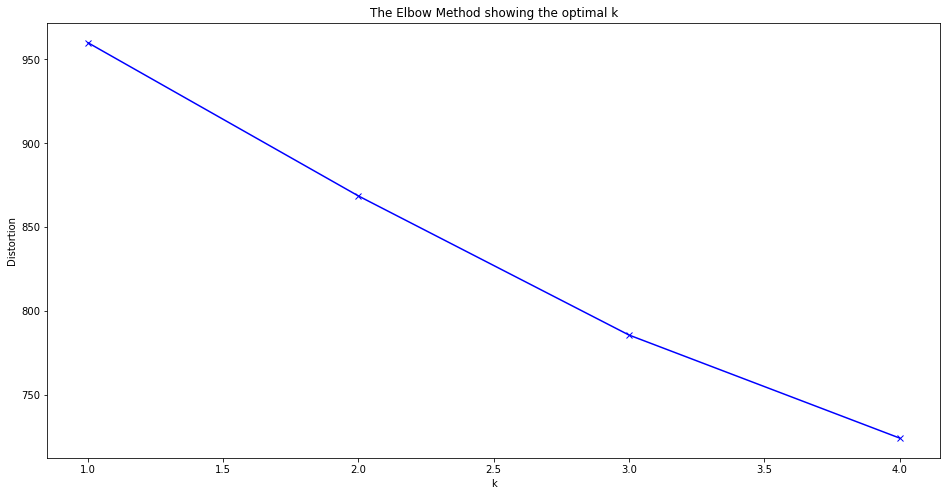

In [93]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We can observe that the light “elbow” is the number 2 which is optimal for this case. Now we can run a K-Means using as n_clusters the number 2.

### 5.1.2 Run *k*-means to cluster the neighborhood into 2 clusters.

In [94]:
NY_data_venues_rate_clus = NY_data_venues_rate.reset_index()

# set number of clusters
kclusters = 2

NY_data_clustering_bronx = NY_data_venues_rate_clus.drop('postalCode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(NY_data_clustering_bronx)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [95]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Bronx_merged = data_coordenadas

# merge to add latitude/longitude for each neighborhood
Bronx_merged = Bronx_merged.join(neighborhoods_venues_sorted.set_index('NEIGHBORHOOD_NAME'), on='NEIGHBORHOOD_NAME')

Bronx_merged # check the last columns!

,postalCode,NEIGHBORHOOD_NAME,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude,Cluster Labels,1st Most Risk Venue,2nd Most Risk Venue,3rd Most Risk Venue,4th Most Risk Venue,5th Most Risk Venue
0,10451,Concourse/Melrose,40.823555,-73.914279,40.824023,-73.915218,0,Supermarkets,Pizza Places,Donut Shops,Grocery Stores,Delis / Bodegas
1,10452,Concourse/Highbridge,40.840307,-73.920172,40.839581,-73.920623,1,Delis / Bodegas,Donut Shops,Metro Stations,Grocery Stores,Supermarkets
2,10453,Morris Heights/Mount Hope/University Heights,40.852463,-73.911982,40.852129,-73.911441,1,Pharmacies,Delis / Bodegas,Fast Food Restaurants,Pizza Places,Supermarkets
3,10454,Mott Haven/Port Morris,40.804544,-73.915034,40.804925,-73.914791,0,Pharmacies,Pizza Places,Grocery Stores,Metro Stations,Donut Shops
4,10455,Mott Haven,40.819643,-73.906483,40.818385,-73.908850,1,Supermarkets,Donut Shops,Fast Food Restaurants,Grocery Stores,Pharmacies
5,10456,Claremont/Morrisania,40.830851,-73.910535,40.831206,-73.911014,0,Pharmacies,Pizza Places,Metro Stations,Bus Stations,Delis / Bodegas
6,10457,Belmont/Claremont/Mount Hope/Tremont,40.844674,-73.894867,40.845090,-73.895676,1,Delis / Bodegas,Donut Shops,Fast Food Restaurants,Grocery Stores,Pharmacies
7,10458,Belmont/Fordham University/Kingsbridge,40.860176,-73.890258,40.859469,-73.889280,1,Supermarkets,Fast Food Restaurants,Pharmacies,Bus Stations,Donut Shops
8,10459,Charlotte Gardens/Hunts Point,40.824175,-73.900074,40.823351,-73.898268,0,Pizza Places,Pharmacies,Delis / Bodegas,Fast Food Restaurants,Donut Shops
9,10460,Charlotte Gardens/Tremont/Van Nest/West Farms,40.840124,-73.882716,40.840827,-73.882258,1,Fast Food Restaurants,Pizza Places,Metro Stations,Banks,Donut Shops


In [96]:
address = 'Bronx, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bronx are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bronx are 40.8466508, -73.8785937.


Finally, let's visualize the resulting clusters

In [97]:
Bronx_merged['Cluster Labels'] = Bronx_merged['Cluster Labels'].astype(int)
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
for cluster in range(0,kclusters): 
    group = folium.FeatureGroup(name='<span style=\\"color: {0};\\">{1}</span><p> Cluster </p>'.format(rainbow[cluster-1],cluster))
    for lat, lon, poi, label in zip(Bronx_merged['Neighborhood Latitude'], Bronx_merged['Neighborhood Longitude'], Bronx_merged['NEIGHBORHOOD_NAME'], Bronx_merged['Cluster Labels']):
        if int(label) == cluster: 
            label = folium.Popup('ORIG. '+ str(poi) + 'Cluster ' + str(cluster), parse_html=True)
            folium.CircleMarker(
                (lat, lon),
                radius=5,
                popup=label,
                color=rainbow[cluster-1],
                fill=True,
                fill_color=rainbow[cluster-1],
                fill_opacity=0.7).add_to(group)
            group.add_to(map_clusters)

            
folium.map.LayerControl('topright', collapsed=False).add_to(map_clusters)
map_clusters.save(outfile= "map_clusters.html")
map_clusters

### 5.1.3 Examine Clusters

#### Cluster 1

In [98]:
Bronx_merged.loc[Bronx_merged['Cluster Labels'] == 0, Bronx_merged.columns[[1] + list(range(5, Bronx_merged.shape[1]))]]

,NEIGHBORHOOD_NAME,Venue Longitude,Cluster Labels,1st Most Risk Venue,2nd Most Risk Venue,3rd Most Risk Venue,4th Most Risk Venue,5th Most Risk Venue
0,Concourse/Melrose,-73.915218,0,Supermarkets,Pizza Places,Donut Shops,Grocery Stores,Delis / Bodegas
3,Mott Haven/Port Morris,-73.914791,0,Pharmacies,Pizza Places,Grocery Stores,Metro Stations,Donut Shops
5,Claremont/Morrisania,-73.911014,0,Pharmacies,Pizza Places,Metro Stations,Bus Stations,Delis / Bodegas
8,Charlotte Gardens/Hunts Point,-73.898268,0,Pizza Places,Pharmacies,Delis / Bodegas,Fast Food Restaurants,Donut Shops
13,City Island,-73.787401,0,Pizza Places,Grocery Stores,Delis / Bodegas,Banks,Diners
15,Edenwald/Wakefield,-73.840101,0,Supermarkets,Pizza Places,Donut Shops,Grocery Stores,Pharmacies
19,Wakefield/Woodlawn,-73.866730,0,Pizza Places,Donut Shops,Grocery Stores,Delis / Bodegas,Bakeries
20,Fieldston/North Riverdale/Riverdale,-73.904635,0,Donut Shops,Grocery Stores,Pizza Places,Banks,Mexican Restaurants
21,Soundview,-73.851567,0,Pizza Places,Discount Stores,Train Stations,Coffee Shops,Fast Food Restaurants
22,Castle Hill/Clason Point/Soundview,-73.859859,0,Supermarkets,Pizza Places,Pharmacies,Banks,Grocery Stores


#### Cluster 2

In [99]:
Bronx_merged.loc[Bronx_merged['Cluster Labels'] == 1, Bronx_merged.columns[[1] + list(range(5, Bronx_merged.shape[1]))]]

,NEIGHBORHOOD_NAME,Venue Longitude,Cluster Labels,1st Most Risk Venue,2nd Most Risk Venue,3rd Most Risk Venue,4th Most Risk Venue,5th Most Risk Venue
1,Concourse/Highbridge,-73.920623,1,Delis / Bodegas,Donut Shops,Metro Stations,Grocery Stores,Supermarkets
2,Morris Heights/Mount Hope/University Heights,-73.911441,1,Pharmacies,Delis / Bodegas,Fast Food Restaurants,Pizza Places,Supermarkets
4,Mott Haven,-73.908850,1,Supermarkets,Donut Shops,Fast Food Restaurants,Grocery Stores,Pharmacies
6,Belmont/Claremont/Mount Hope/Tremont,-73.895676,1,Delis / Bodegas,Donut Shops,Fast Food Restaurants,Grocery Stores,Pharmacies
7,Belmont/Fordham University/Kingsbridge,-73.889280,1,Supermarkets,Fast Food Restaurants,Pharmacies,Bus Stations,Donut Shops
9,Charlotte Gardens/Tremont/Van Nest/West Farms,-73.882258,1,Fast Food Restaurants,Pizza Places,Metro Stations,Banks,Donut Shops
10,Morris Park/Pelham Bay/Westchester Square,-73.843034,1,Supermarkets,Bus Stations,Pharmacies,Pizza Places,Parks
11,Parkchester/Pelham Parkway/Van Nest/Westcheste...,-73.858830,1,Fast Food Restaurants,Donut Shops,Banks,Bus Stations,Pizza Places
12,Kingsbridge/Marble Hill/Riverdale/Spuyten Duyvil,-73.904934,1,Fast Food Restaurants,Grocery Stores,Donut Shops,Pharmacies,Bus Stations
14,Country Club/Throgs Neck,-73.820069,1,Donut Shops,Fast Food Restaurants,Delis / Bodegas,Pharmacies,Banks


## Graphic Cluster Venues Risk

In [100]:
cluster_risk_graphic= pd.DataFrame([], columns=[])
cluster_risk = pd.merge(left=Bronx_merged, right=NY_data_all, how='left', left_on='postalCode', right_on='postalCode')
cluster_risk_graphic[['postalCode','Cluster Labels','total ceof risk venues']] =  cluster_risk[['postalCode','Cluster Labels','total ceof risk venues']].astype('int64')
cluster_risk_graphic.head()

,postalCode,Cluster Labels,total ceof risk venues
0,10451,0,50
1,10452,1,28
2,10453,1,46
3,10454,0,30
4,10455,1,39


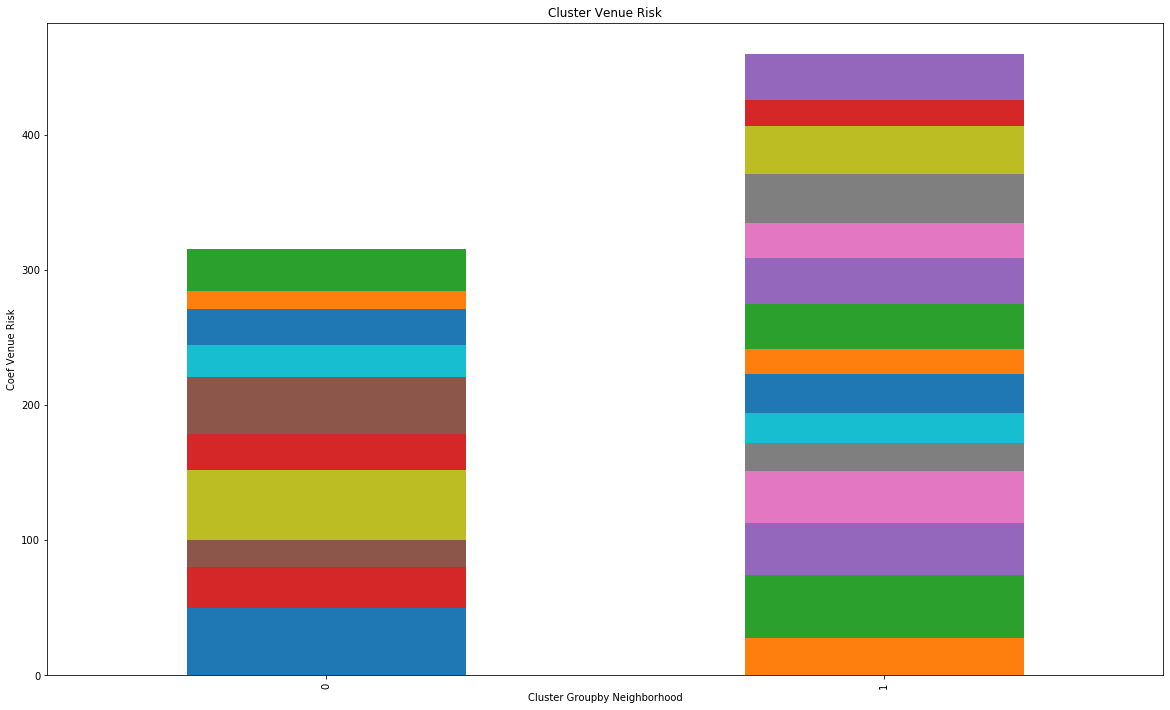

In [101]:
# step 1: get the data
df1=cluster_risk_graphic.pivot(columns='postalCode',index='Cluster Labels').fillna(0)
df1.plot(kind='bar',stacked=True,legend=False,figsize=(20, 12))

plt.title('Cluster Venue Risk')
plt.ylabel('Coef Venue Risk')
plt.xlabel('Cluster Groupby Neighborhood')

plt.show()


# 6. Now let's visualize them 

## 6.1 Covid Cases in NY

In [102]:
NY_Covid= pd.DataFrame([], columns=[])
NY_Covid = nychealth.groupby(['BOROUGH_GROUP']).sum()
NY_Covid

,MODIFIED_ZCTA,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
BOROUGH_GROUP,,,,,,,,
Bronx,261575,48043,83846.02,1434692.65,3878,6642.03,476.19,248927
Brooklyn,415151,57802,81719.90,2582829.99,5567,8184.23,526.68,397985
Manhattan,441720,26481,68185.49,1611943.49,2475,5992.16,405.73,271777
Queens,682406,64915,161863.03,2288709.82,5910,14076.69,1114.83,366447
Staten Island,123681,14105,35693.99,476179.01,895,2124.51,219.30,78084


In [103]:
gra_ny= pd.DataFrame([], columns=[])
gra_ny = NY_Covid.drop(NY_Covid.columns[[0,1,3,4,6]], axis=1)
gra_ny = gra_ny.T
gra_ny

BOROUGH_GROUP,Bronx,Brooklyn,Manhattan,Queens,Staten Island
COVID_CASE_RATE,83846.02,81719.90,68185.49,161863.03,35693.99
COVID_DEATH_RATE,6642.03,8184.23,5992.16,14076.69,2124.51
TOTAL_COVID_TESTS,248927.00,397985.00,271777.00,366447.00,78084.00


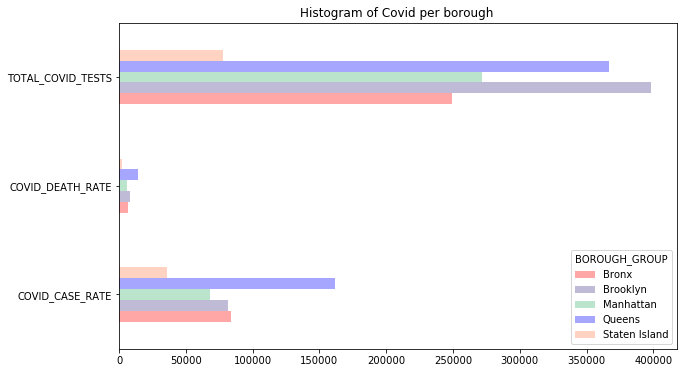

In [104]:
# un-stacked histogram
gra_ny.plot(kind ='barh', 
          figsize=(10, 6),
          alpha=0.35,
         color=['red', 'darkslateblue', 'mediumseagreen','blue', 'coral']
         )

plt.title('Histogram of Covid per borough ')
plt.show()

In [105]:
borough_coor = pd.DataFrame([], columns=[])
borough_coor1 = neighborhoods.drop('Neighborhood',axis=1)
borough_coor =borough_coor1.groupby(['Borough']).mean().reset_index()
borough_coor

,Borough,Latitude,Longitude
0,Bronx,40.850482,-73.873442
1,Brooklyn,40.651089,-73.952999
2,Manhattan,40.762438,-73.975329
3,Queens,40.706424,-73.824131
4,Staten Island,40.588851,-74.137414


In [106]:
ny_cov = folium.Map(location=[latitude, longitude], zoom_start=11)



# I can add marker one by one on the map
for i in range(0,len(borough_coor)):
   folium.Circle(
      location=[borough_coor.iloc[i]['Latitude'], borough_coor.iloc[i]['Longitude']],
      popup=borough_coor.iloc[i]['Borough'],
      radius=NY_Covid.iloc[i]['COVID_CASE_RATE']/15,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(ny_cov)

ny_cov

## 6.2 Map of the sum of risks venues by neighborhood

In [107]:
NY_coef_neigh= pd.DataFrame([], columns=[])
NY_coef_neigh[['postalCode','NEIGHBORHOOD_NAME','total ceof risk venues']] = NY_data_all[['postalCode','NEIGHBORHOOD_NAME','total ceof risk venues']].sort_values('total ceof risk venues', ascending=False)
NY_coef_neigh

,postalCode,NEIGHBORHOOD_NAME,total ceof risk venues
8,10459,Charlotte Gardens/Hunts Point,52.451129
0,10451,Concourse/Melrose,50.109101
2,10453,Morris Heights/Mount Hope/University Heights,46.730412
15,10466,Edenwald/Wakefield,42.497500
4,10455,Mott Haven,39.181140
6,10457,Belmont/Claremont/Mount Hope/Tremont,38.974518
18,10469,Allerton/Baychester/Pelham Gardens/Williamsbridge,36.792222
17,10468,Fordham/Kingsbridge/University Heights,36.053629
24,10475,Co-op City/Edenwald,34.932105
14,10465,Country Club/Throgs Neck,34.896246


In [108]:
NY_data_suma.head()

,postalCode,total ceof risk venues
0,10451.0,50.109101
1,10452.0,28.648590
2,10453.0,46.730412
3,10454.0,30.214936
4,10455.0,39.181140


In [109]:
#NY_data
#Bronx_venues_visit
data_coordenadas

,postalCode,NEIGHBORHOOD_NAME,Neighborhood Latitude,Neighborhood Longitude,Venue Latitude,Venue Longitude
0,10451,Concourse/Melrose,40.823555,-73.914279,40.824023,-73.915218
1,10452,Concourse/Highbridge,40.840307,-73.920172,40.839581,-73.920623
2,10453,Morris Heights/Mount Hope/University Heights,40.852463,-73.911982,40.852129,-73.911441
3,10454,Mott Haven/Port Morris,40.804544,-73.915034,40.804925,-73.914791
4,10455,Mott Haven,40.819643,-73.906483,40.818385,-73.908850
5,10456,Claremont/Morrisania,40.830851,-73.910535,40.831206,-73.911014
6,10457,Belmont/Claremont/Mount Hope/Tremont,40.844674,-73.894867,40.845090,-73.895676
7,10458,Belmont/Fordham University/Kingsbridge,40.860176,-73.890258,40.859469,-73.889280
8,10459,Charlotte Gardens/Hunts Point,40.824175,-73.900074,40.823351,-73.898268
9,10460,Charlotte Gardens/Tremont/Van Nest/West Farms,40.840124,-73.882716,40.840827,-73.882258


In [110]:
PC_total= pd.DataFrame([], columns=[])
PC_total = pd.merge(left=NY_data_suma, right=data_coordenadas, how='left', left_on='postalCode', right_on='postalCode')
PC_total['postalCode'] = PC_total['postalCode'].astype('str')
PC_total.dtypes

postalCode                 object
total ceof risk venues    float64
NEIGHBORHOOD_NAME          object
Neighborhood Latitude     float64
Neighborhood Longitude    float64
Venue Latitude            float64
Venue Longitude           float64
dtype: object

In [111]:
NY_data_all['postalCode'] = NY_data_all['postalCode'].astype('str')
NY_data_all.dtypes

postalCode                     object
NEIGHBORHOOD_NAME              object
BOROUGH_GROUP                  object
COVID_CASE_COUNT                int64
COVID_CASE_RATE               float64
POP_DENOMINATOR               float64
COVID_DEATH_COUNT               int64
COVID_DEATH_RATE              float64
PERCENT_POSITIVE              float64
TOTAL_COVID_TESTS               int64
American Restaurants            int64
Automotive Shops                int64
Bakeries                        int64
Banks                           int64
Bars                            int64
Buildings                       int64
Bus Lines                       int64
Bus Stations                    int64
Bus Stops                       int64
Caribbean Restaurants           int64
Chinese Restaurants             int64
Coffee Shops                    int64
Convenience Stores              int64
Delis / Bodegas                 int64
Department Stores               int64
Diners                          int64
Discount Sto

In [112]:

# Make an empty map
map_total = folium.Map(location=[latitude, longitude], zoom_start=11)
 
# I can add marker one by one on the map
for i in range(0,len(NY_data_all)):
   folium.Circle(
      location=[NY_data_all.iloc[i]['Neighborhood Latitude'], NY_data_all.iloc[i]['Neighborhood Longitude']],
      popup=NY_data_all.iloc[i]['postalCode'],
      radius=NY_data_all.iloc[i]['total ceof risk venues']*17,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(map_total)
 
# Save it as html

map_total

## 6.3 Map of the Covid cases rate by neighborhood

In [113]:
NY_data.head()

,postalCode,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS,American Restaurants,Automotive Shops,Bakeries,Banks,Bars,Buildings,Bus Lines,Bus Stations,Bus Stops,Caribbean Restaurants,Chinese Restaurants,Coffee Shops,Convenience Stores,Delis / Bodegas,Department Stores,Diners,Discount Stores,Doctor's Offices,Donut Shops,Fast Food Restaurants,Fried Chicken Joints,Gas Stations,Grocery Stores,Gyms,Gyms or Fitness Centers,Intersections,Italian Restaurants,Latin American Restaurants,Liquor Stores,Metro Stations,Mexican Restaurants,Miscellaneous Shops,Parks,Pharmacies,Pizza Places,Playgrounds,Plazas,Post Offices,Salons / Barbershops,Sandwich Places,Seafood Restaurants,Shopping Malls,Spanish Restaurants,Supermarkets,Train Stations
0,10451,Concourse/Melrose,Bronx,1650,3457.76,47718.77,148,310.15,18.31,9010,0,0,0,0,0,0,0,93871763,0,0,13917337,8224032,3158584,124311174,0,6352920,14606212,0,219927624,105157590,8503972,0,178706187,0,1973068,0,11951680,0,0,0,8559914,0,72813924,105059950,229629072,0,0,2174476,0,2125226,0,7918906,0,230234496,0
1,10452,Concourse/Highbridge,Bronx,2586,3356.91,77035.04,169,219.38,19.41,13325,0,0,0,0,7404537,0,0,46935881,0,0,9278225,0,0,124311174,0,12705840,14606212,0,109963812,52578795,5669315,0,89353093,4212344,0,0,5975840,3424112,0,104374520,0,0,36406962,63035970,76543024,912597,0,0,0,8500905,483469,0,0,76744832,0
2,10453,Morris Heights/Mount Hope/University Heights,Bronx,2555,3147.17,81184.04,163,200.78,20.50,12463,0,0,6511330,52085401,0,0,0,31290587,0,0,13917337,0,0,248622348,0,0,0,0,109963812,210315180,17007945,0,89353093,0,0,0,0,6848224,0,104374520,0,0,0,315179852,153086048,0,0,0,0,8500905,0,0,2665303,115117248,0
3,10454,Mott Haven/Port Morris,Bronx,1214,3176.06,38223.41,105,274.70,17.95,6765,0,0,13022660,0,7404537,0,0,0,0,0,0,8224032,0,0,0,0,14606212,0,73309208,0,0,0,178706187,4212344,0,0,0,0,0,104374520,0,0,0,315179852,229629072,0,0,0,0,0,0,0,2665303,0,0
4,10455,Mott Haven,Bronx,1382,3276.87,42174.38,108,256.08,19.50,7086,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3672312,12705840,14606212,0,219927624,210315180,0,0,178706187,0,0,0,0,6848224,0,0,0,0,0,157589926,153086048,0,0,0,0,0,0,0,7995909,230234496,0


In [114]:
# Make an empty map
map_covidCases = folium.Map(location=[latitude, longitude], zoom_start=11)
 
# I can add marker one by one on the map
for i in range(0,len(NY_data_all)):
   folium.Circle(
      location=[NY_data_all.iloc[i]['Neighborhood Latitude'], NY_data_all.iloc[i]['Neighborhood Longitude']],
      popup=NY_data_all.iloc[i]['postalCode'],
      radius=NY_data_all.iloc[i]['COVID_CASE_RATE']*2/10,
      color='blue',
      fill=True,
      fill_color='crimson'
   ).add_to(map_covidCases)
 
map_covidCases

## 6.4 Map of the Covid death rate by neighborhood

In [115]:
# Make an empty map
map_covidCases = folium.Map(location=[latitude, longitude], zoom_start=11)
 
# I can add marker one by one on the map
for i in range(0,len(NY_data_all)):
   folium.Circle(
      location=[NY_data_all.iloc[i]['Neighborhood Latitude'], NY_data_all.iloc[i]['Neighborhood Longitude']],
      popup=NY_data_all.iloc[i]['postalCode'],
      radius=NY_data_all.iloc[i]['COVID_DEATH_RATE']*2,
      color='purple',
      fill=True,
      fill_color='crimson'
   ).add_to(map_covidCases)
 
map_covidCases